# World University Rankings

https://www.kaggle.com/mylesoneill/world-university-rankings

## Description

* world_rank - world rank for the university. 
* university_name - name of university.
* country - country of each university.
* teaching - university score for teaching (the learning environment).
* international - university score international outlook (staff, students, research).
* research - university score for research (volume, income and reputation).
* citations - university score for citations (research influence).
* income - university score for industry income (knowledge transfer).
* total_score - total score for university, used to determine rank.
* num_students - number of students at the university.
* student_staff_ratio - Number of students divided by number of staff.
* international_students - Percentage of students who are international.
* female_male_ratio - Female student to Male student ratio.
* year - year of the ranking (2011 to 2016 included).

In [2]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# To access help
pd.read_csv?

In [81]:
# Load the Data and take a quick look.
timesRanking = pd.read_csv('Data/Universities/timesData.csv',thousands=',')
timesRanking.tail(2)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2601,601-800,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,-,10117.0,12.1,8%,28 : 72,2016
2602,601-800,Yuan Ze University,Taiwan,16.2,17.7,18.3,28.6,39.8,-,8663.0,20.6,4%,43 : 57,2016


In [82]:
# Checking Data types
timesRanking.dtypes

world_rank                 object
university_name            object
country                    object
teaching                  float64
international              object
research                  float64
citations                 float64
income                     object
total_score                object
num_students              float64
student_staff_ratio       float64
international_students     object
female_male_ratio          object
year                        int64
dtype: object

In [83]:
print (timesRanking[pd.to_numeric(timesRanking.world_rank, errors='coerce').isnull()])['world_rank']

400     201-225
401     201-225
402     201-225
403     201-225
404     201-225
405     201-225
406     201-225
407     201-225
408     201-225
409     201-225
410     201-225
411     201-225
412     201-225
413     201-225
414     201-225
415     201-225
416     201-225
417     201-225
418     201-225
419     201-225
420     201-225
421     201-225
422     201-225
423     201-225
424     201-225
425     201-225
426     201-225
427     226-250
428     226-250
429     226-250
         ...   
2573    601-800
2574    601-800
2575    601-800
2576    601-800
2577    601-800
2578    601-800
2579    601-800
2580    601-800
2581    601-800
2582    601-800
2583    601-800
2584    601-800
2585    601-800
2586    601-800
2587    601-800
2588    601-800
2589    601-800
2590    601-800
2591    601-800
2592    601-800
2593    601-800
2594    601-800
2595    601-800
2596    601-800
2597    601-800
2598    601-800
2599    601-800
2600    601-800
2601    601-800
2602    601-800
Name: world_rank, dtype:

In [84]:
print (timesRanking[pd.to_numeric(timesRanking.international, errors='coerce').isnull()])['international']
print (timesRanking[pd.to_numeric(timesRanking.income, errors='coerce').isnull()])['income']
print (timesRanking[pd.to_numeric(timesRanking.total_score, errors='coerce').isnull()])['total_score']
print (timesRanking[pd.to_numeric(timesRanking.international_students, errors='coerce').isnull()])['international_students']


16     -
43     -
49     -
92     -
128    -
130    -
137    -
172    -
199    -
Name: international, dtype: object
4       -
7       -
9       -
10      -
11      -
14      -
16      -
17      -
24      -
25      -
32      -
34      -
37      -
38      -
42      -
45      -
48      -
51      -
52      -
54      -
59      -
60      -
62      -
64      -
65      -
66      -
68      -
69      -
71      -
73      -
       ..
2236    -
2251    -
2257    -
2258    -
2263    -
2302    -
2303    -
2312    -
2314    -
2319    -
2379    -
2405    -
2426    -
2432    -
2454    -
2456    -
2462    -
2464    -
2465    -
2467    -
2469    -
2474    -
2508    -
2511    -
2556    -
2566    -
2573    -
2574    -
2575    -
2595    -
Name: income, dtype: object
400     -
401     -
402     -
403     -
404     -
405     -
406     -
407     -
408     -
409     -
410     -
411     -
412     -
413     -
414     -
415     -
416     -
417     -
418     -
419     -
420     -
421     -
422     -
423     -
424   

In [85]:
# CLEANUP: Remove some unwanted characters from the world_rank column
# during the class we used this same commands to remove characters from different columns. 
# This can be used combined with the previous commands to identify which characters to remove.
timesRanking.world_rank=timesRanking.world_rank.str.replace('=','')
timesRanking.international=timesRanking.international.str.replace('-','')
timesRanking.income=timesRanking.income.str.replace('-','')
timesRanking.total_score=timesRanking.total_score.str.replace('-','')

In [98]:
timesRanking.tail()

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2598,700.5,Yeungnam University,South Korea,18.6,24.3,10.9,26.5,35.4,NaN,21958.0,15.3,0.03,48 : 52,2016
2599,700.5,Yıldız Technical University,Turkey,14.5,14.9,7.6,19.3,44.0,NaN,31268.0,28.7,0.02,36 : 64,2016
2600,700.5,Yokohama City University,Japan,24.0,16.1,10.2,36.4,37.9,NaN,4122.0,3.7,0.03,NaN,2016
2601,700.5,Yokohama National University,Japan,20.1,23.3,16.0,13.5,40.4,NaN,10117.0,12.1,0.08,28 : 72,2016
2602,700.5,Yuan Ze University,Taiwan,16.2,17.7,18.3,28.6,39.8,NaN,8663.0,20.6,0.04,43 : 57,2016


In [87]:
# For the records where world_rank is expressed as a range, we will calculate the average ranking
Ranking_avg = timesRanking[timesRanking.world_rank.str.contains('-')]['world_rank'].str.split('-').map(lambda x: map(int,x)).map(sum)/2
timesRanking.loc[timesRanking.world_rank.str.contains('-'),'world_rank'] = Ranking_avg


In [88]:
timesRanking.tail(50)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2553,700.5,Shantou University,China,17.6,30.7,9.1,28.3,30.7,,9593.0,13.5,0%,48 : 52,2016
2554,700.5,Sheffield Hallam University,United Kingdom,17.3,47.0,9.4,20.1,28.6,,27477.0,18.8,15%,53 : 47,2016
2555,700.5,Shinshu University,Japan,20.8,20.3,8.3,22.0,31.6,,11232.0,9.6,3%,NaN,2016
2556,700.5,Showa University,Japan,28.5,14.0,7.9,7.0,,,3675.0,2.5,0%,57 : 43,2016
2557,700.5,Sichuan University,China,25.0,15.7,18.4,16.1,90.8,,65035.0,14.5,2%,48 : 52,2016
2558,700.5,University of Silesia in Katowice,Poland,17.7,18.5,8.0,20.4,28.1,,32764.0,17.3,1%,65 : 35,2016
2559,700.5,Slovak University of Technology in Bratislava,Slovakia,23.3,30.6,8.6,24.9,33.2,,16400.0,15.3,2%,31 : 69,2016
2560,700.5,Sogang University,South Korea,21.5,27.7,24.8,20.5,46.8,,10625.0,24.1,7%,43 : 57,2016
2561,700.5,Sophia University,Japan,22.0,32.8,9.4,5.3,29.5,,12799.0,24.3,8%,53 : 47,2016
2562,700.5,University of South Africa,South Africa,18.4,28.7,11.3,9.4,28.8,,197102.0,108.5,9%,65 : 35,2016


In [89]:
# and convert it to numeric
timesRanking.world_rank = pd.to_numeric(timesRanking.world_rank)

In [93]:
timesRanking.tail(50)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
2553,700.5,Shantou University,China,17.6,30.7,9.1,28.3,30.7,,9593.0,13.5,0%,48 : 52,2016
2554,700.5,Sheffield Hallam University,United Kingdom,17.3,47.0,9.4,20.1,28.6,,27477.0,18.8,15%,53 : 47,2016
2555,700.5,Shinshu University,Japan,20.8,20.3,8.3,22.0,31.6,,11232.0,9.6,3%,NaN,2016
2556,700.5,Showa University,Japan,28.5,14.0,7.9,7.0,,,3675.0,2.5,0%,57 : 43,2016
2557,700.5,Sichuan University,China,25.0,15.7,18.4,16.1,90.8,,65035.0,14.5,2%,48 : 52,2016
2558,700.5,University of Silesia in Katowice,Poland,17.7,18.5,8.0,20.4,28.1,,32764.0,17.3,1%,65 : 35,2016
2559,700.5,Slovak University of Technology in Bratislava,Slovakia,23.3,30.6,8.6,24.9,33.2,,16400.0,15.3,2%,31 : 69,2016
2560,700.5,Sogang University,South Korea,21.5,27.7,24.8,20.5,46.8,,10625.0,24.1,7%,43 : 57,2016
2561,700.5,Sophia University,Japan,22.0,32.8,9.4,5.3,29.5,,12799.0,24.3,8%,53 : 47,2016
2562,700.5,University of South Africa,South Africa,18.4,28.7,11.3,9.4,28.8,,197102.0,108.5,9%,65 : 35,2016


In [94]:
# we use isnull to identify the records that cannot be converted to numeric. 
# During the class we run this same command with several columns: international, income, total_score, female_male_ratio...
# HOMEWORK: work with the female_male_ratio column

print (timesRanking[pd.to_numeric(timesRanking.female_male_ratio, errors='coerce')\
                    .isnull()])['female_male_ratio']


0           NaN
1       33 : 67
2       37 : 63
3       42 : 58
4       45 : 55
5       46 : 54
6       46 : 54
7       50 : 50
8       37 : 63
9       50 : 50
10      52 : 48
11      42 : 58
12      50 : 50
13      48 : 52
14      31 : 69
15      48 : 52
16          NaN
17          NaN
18      51 : 49
19      39 : 61
20      53 : 47
21      56 : 44
22      53 : 47
23      49 : 51
24      48 : 52
25          NaN
26      31 : 69
27      20 : 80
28      52 : 48
29      54 : 46
         ...   
2573    45 : 55
2574    54 : 46
2575    46 : 54
2576    27 : 73
2577    34 : 66
2578    34 : 66
2579    20 : 80
2580    60 : 40
2581    34 : 66
2582     9 : 91
2583    62 : 38
2584    63 : 37
2585    61 : 39
2586    65 : 35
2587    48 : 52
2588    53 : 47
2589    51 : 49
2590    65 : 35
2591    34 : 66
2592    35 : 65
2593    52 : 48
2594    53 : 47
2595    62 : 38
2596    57 : 43
2597    29 : 71
2598    48 : 52
2599    36 : 64
2600        NaN
2601    28 : 72
2602    43 : 57
Name: female_male_ratio,

In [95]:
#Convert to numeric, ignoring errors.
#special characters were already removed from the strings, this should be able to convert all the fields
timesRanking.international = pd.to_numeric(timesRanking.international,errors='coerce')
timesRanking.income = pd.to_numeric(timesRanking.income,errors='coerce')
timesRanking.total_score = pd.to_numeric(timesRanking.total_score,errors='coerce')

In [96]:
timesRanking.international_students=pd.to_numeric(timesRanking.international_students.str.strip('%'))/100

In [102]:
# Top 10 universities in 2016
timesRanking.loc[timesRanking.year==2016,:].sort_values('world_rank',ascending=True).head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1.0,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,0.27,33 : 67,2016
1804,2.0,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,0.34,46 : 54,2016
1805,3.0,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,0.22,42 : 58,2016
1806,4.0,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,0.34,46 : 54,2016
1807,5.0,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,0.33,37 : 63,2016
1808,6.0,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,20152.0,8.9,0.25,NaN,2016
1809,7.0,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,0.27,45 : 55,2016
1810,8.0,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,89.1,15060.0,11.7,0.51,37 : 63,2016
1811,9.0,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,88.3,18178.0,14.7,0.37,31 : 69,2016
1812,10.0,University of Chicago,United States of America,85.7,65.0,88.9,99.2,36.6,87.9,14221.0,6.9,0.21,42 : 58,2016


In [278]:
# At this moment we won't be removing NaN records, but if needed the instruction would be ->  timesRanking.dropna(inplace=True) 

In [99]:
# Another alternative to see data types:
print(timesRanking.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
world_rank                2603 non-null float64
university_name           2603 non-null object
country                   2603 non-null object
teaching                  2603 non-null float64
international             2594 non-null float64
research                  2603 non-null float64
citations                 2603 non-null float64
income                    2385 non-null float64
total_score               1201 non-null float64
num_students              2544 non-null float64
student_staff_ratio       2544 non-null float64
international_students    2536 non-null float64
female_male_ratio         2370 non-null object
year                      2603 non-null int64
dtypes: float64(10), int64(1), object(3)
memory usage: 284.8+ KB
None


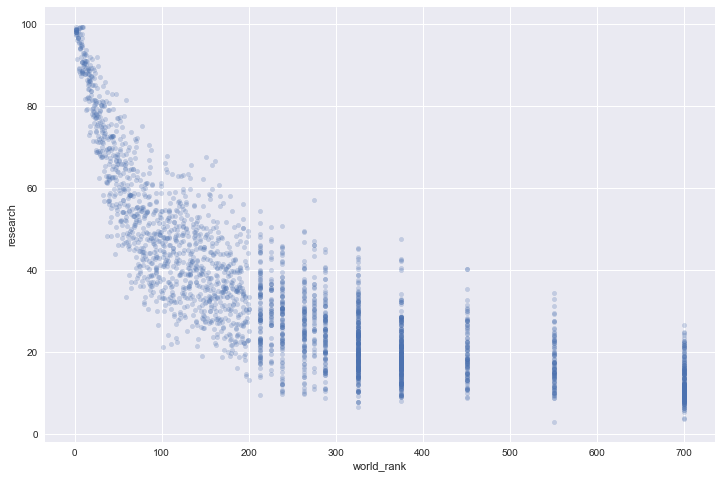

In [100]:
#Scatter plot: World Rank vs Research
timesRanking.plot.scatter('world_rank','research',alpha=0.25,figsize=(12,8));

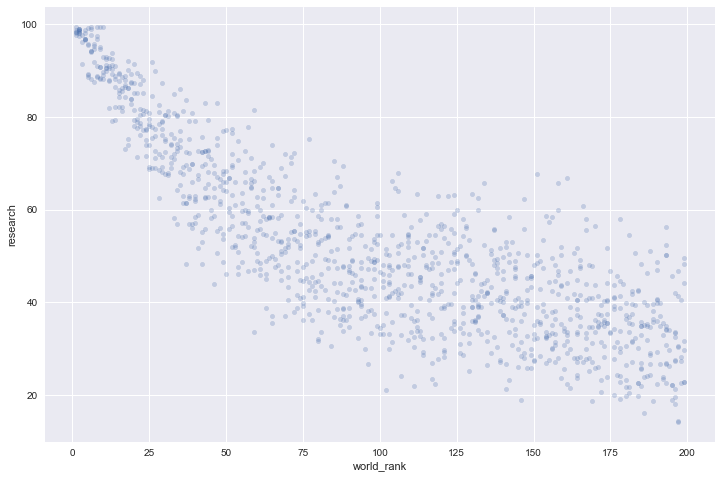

In [101]:
# Scatter Plot V2: World Rank vs Research filtering world rank > 200 not to include the ranges
timesRanking[timesRanking.world_rank<200]\
        .plot.scatter('world_rank','research',alpha=0.25,figsize=(12,8));

In [103]:
#Top 10 Universities in the United States in 2016
timesRanking.loc[timesRanking.year==2016,:].loc[timesRanking.country.str.contains('United States'),:]\
        .sort_values('world_rank',ascending=True).head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1.0,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,0.27,33 : 67,2016
1805,3.0,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,0.22,42 : 58,2016
1807,5.0,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,0.33,37 : 63,2016
1808,6.0,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,20152.0,8.9,0.25,NaN,2016
1809,7.0,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,0.27,45 : 55,2016
1812,10.0,University of Chicago,United States of America,85.7,65.0,88.9,99.2,36.6,87.9,14221.0,6.9,0.21,42 : 58,2016
1813,11.0,Johns Hopkins University,United States of America,77.6,70.0,90.4,98.2,100.0,87.6,15128.0,3.6,0.23,50 : 50,2016
1814,12.0,Yale University,United States of America,86.5,64.3,87.8,97.2,43.3,87.4,11751.0,4.4,0.20,50 : 50,2016
1815,13.0,"University of California, Berkeley",United States of America,80.4,61.9,91.1,99.7,47.9,87.2,36186.0,16.4,0.15,50 : 50,2016
1817,15.0,Columbia University,United States of America,85.9,73.5,82.2,98.1,NaN,86.1,25055.0,5.9,0.28,NaN,2016


In [104]:
# We will group by Country, and show the info of each group
grouped = timesRanking.groupby('country')

for name, group in grouped:
    print(name)
    print(group)

Argentina
      world_rank                 university_name    country  teaching  \
2518       700.5  National University of Córdoba  Argentina      16.0   

      international  research  citations  income  total_score  num_students  \
2518           28.1       9.0       12.5    28.6          NaN      108373.0   

      student_staff_ratio  international_students female_male_ratio  year  
2518                 38.1                    0.02           62 : 38  2016  
Australia
      world_rank                      university_name    country  teaching  \
35          36.0              University of Melbourne  Australia      58.7   
42          43.0       Australian National University  Australia      51.9   
70          71.0                 University of Sydney  Australia      49.8   
72          73.0               University of Adelaide  Australia      46.5   
80          81.0         The University of Queensland  Australia      51.8   
153        152.0        University of New South Wales 

In [105]:
# Listing the information in a group using get_group:
grouped.get_group('Australia')

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
35,36.0,University of Melbourne,Australia,58.7,88.0,69.2,83.3,47.7,71.0,40128.0,23.7,0.35,55 : 45,2011
42,43.0,Australian National University,Australia,51.9,93.9,62.4,81.0,NaN,67.0,14604.0,19.2,0.35,52 : 48,2011
70,71.0,University of Sydney,Australia,49.8,89.6,61.9,64.3,90.8,61.2,41868.0,20.2,0.28,57 : 43,2011
72,73.0,University of Adelaide,Australia,46.5,87.5,38.8,90.5,52.7,60.7,20771.0,30.1,0.26,48 : 52,2011
80,81.0,The University of Queensland,Australia,51.8,74.2,53.4,69.0,57.1,59.1,34718.0,32.7,0.27,53 : 47,2011
153,152.0,University of New South Wales,Australia,49.5,70.7,48.9,51.2,60.0,51.2,38309.0,25.9,0.33,47 : 53,2011
178,178.0,Monash University,Australia,39.4,87.1,38.8,60.5,40.8,48.5,50882.0,40.5,0.36,56 : 44,2011
236,37.0,University of Melbourne,Australia,62.2,82.5,72.4,80.7,44.4,71.9,40128.0,23.7,0.35,55 : 45,2012
237,38.0,Australian National University,Australia,62.8,93.8,75.1,72.6,41.7,71.2,14604.0,19.2,0.35,52 : 48,2012
257,58.0,University of Sydney,Australia,55.4,88.1,65.7,57.2,92.1,62.4,41868.0,20.2,0.28,57 : 43,2012


In [106]:
# Grouping by two fields, and using get_group to list its information
timesRanking.groupby(['country', 'university_name'])\
            .get_group(('Australia', 'Australian National University'))

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
42,43.0,Australian National University,Australia,51.9,93.9,62.4,81.0,NaN,67.0,14604.0,19.2,0.35,52 : 48,2011
237,38.0,Australian National University,Australia,62.8,93.8,75.1,72.6,41.7,71.2,14604.0,19.2,0.35,52 : 48,2012
638,37.0,Australian National University,Australia,68.6,90.0,83.5,73.5,39.6,75.4,14604.0,19.2,0.35,52 : 48,2013
1049,48.0,Australian National University,Australia,51.8,91.4,65.1,71.2,44.8,64.4,14604.0,19.2,0.35,52 : 48,2014
1446,45.0,Australian National University,Australia,53.7,91.3,70.9,71.1,38.9,66.5,14604.0,19.2,0.35,52 : 48,2015
1854,52.0,Australian National University,Australia,54.7,93.3,77.3,72.3,48.0,69.5,14604.0,19.2,0.35,52 : 48,2016


In [107]:
# Top Countries (approved by de Moivre)
# We will only include countries with at least 20 records.
# we create a list of countries with 20+ records that we will be use later for the box plots
grouped = timesRanking.loc[:,['country','world_rank']].groupby('country')\
        .agg(['mean','count'])
top_countries = grouped[grouped[('world_rank','count')]>20][('world_rank','mean')]\
        .sort_values(ascending=True)
top_countries

country
Switzerland                 120.042553
Netherlands                 121.046667
Hong Kong                   157.029412
United States of America    169.707132
Sweden                      180.464912
Germany                     198.322368
Belgium                     199.081081
Denmark                     201.241379
Canada                      202.754630
United Kingdom              213.386667
Australia                   244.782051
France                      249.342466
Norway                      250.690476
Austria                     269.403226
Republic of Ireland         282.774194
Finland                     303.312500
New Zealand                 306.716667
South Korea                 309.587719
Italy                       326.558511
Turkey                      336.833333
China                       363.825301
Japan                       366.275510
Spain                       388.929825
Taiwan                      405.315789
India                       464.250000
Brazil           

In [108]:
grouped.describe()

world_rank            
             mean       count
count   72.000000   72.000000
mean   438.877841   36.152778
std    193.111010   87.460359
min     66.750000    1.000000
25%    270.225806    1.750000
50%    420.450000    9.500000
75%    631.750000   32.250000
max    700.500000  659.000000

In [109]:
grouped.head()

world_rank      
                  mean count
country                     
Argentina   700.500000     1
Australia   244.782051   117
Austria     269.403226    31
Bangladesh  700.500000     1
Belarus     700.500000     1

In [110]:
grouped.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, Argentina to Unted Kingdom
Data columns (total 2 columns):
(world_rank, mean)     72 non-null float64
(world_rank, count)    72 non-null int64
dtypes: float64(1), int64(1)
memory usage: 1.7+ KB


In [111]:
# Reset index will remove the index by country, country information will now appear as a column.
grouped.reset_index(inplace=True)
grouped.head(10)

country  world_rank      
                     mean count
0   Argentina  700.500000     1
1   Australia  244.782051   117
2     Austria  269.403226    31
3  Bangladesh  700.500000     1
4     Belarus  700.500000     1
5     Belgium  199.081081    37
6      Brazil  513.900000    25
7      Canada  202.754630   108
8       Chile  523.875000     8
9       China  363.825301    83

In [112]:
# Listing information from one country
grouped.loc[grouped.country.str.contains('Argentina')]

country world_rank      
                   mean count
0  Argentina      700.5     1

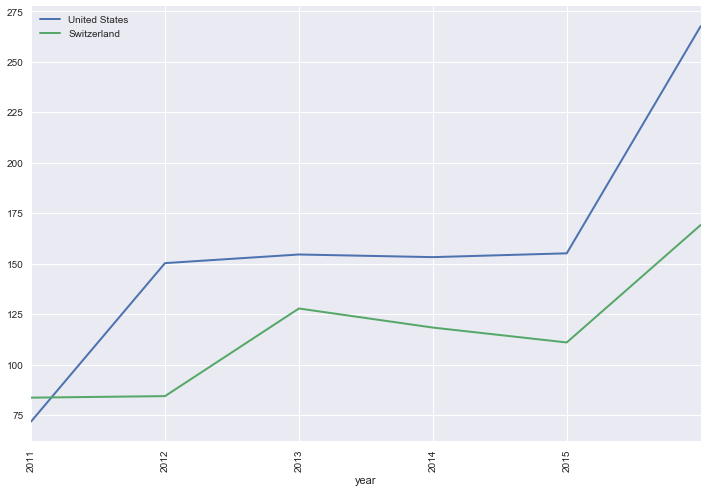

In [113]:
# Line plot showing the average ranking for the universities in USA and Switzerland from 2011-2016
plt.figure()
timesRanking.loc[timesRanking.country.str.contains('United States'),\
                 ['university_name','world_rank','year']].groupby('year').mean()\
                 .loc[:,'world_rank'].plot(rot=90,xticks=range(2011,2016), \
                 linewidth=2,figsize=(12,8),label='United States');
timesRanking.loc[timesRanking.country.str.contains('Switzerland'),\
                 ['university_name','world_rank','year']].groupby('year').mean()\
                 .loc[:,'world_rank'].plot(rot=90,xticks=range(2011,2016), \
                 linewidth=2,label='Switzerland');
plt.legend();

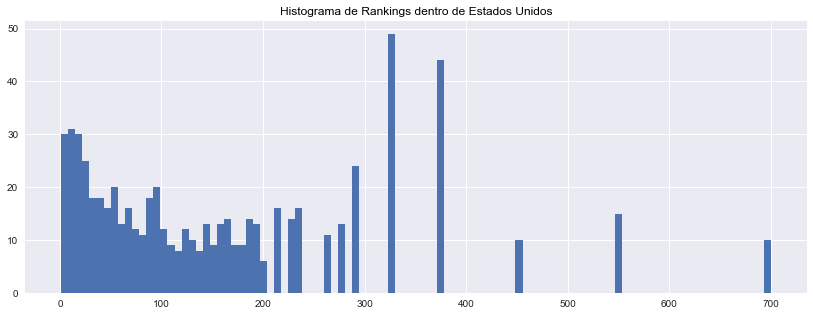

In [326]:
#Histogram showing the distribution of the values for world_rank variable within the USA
plt.figure()
plt.title('Histograma de Rankings dentro de Estados Unidos', color='black')
timesRanking.loc[timesRanking.country.str.contains('United States'),:]\
        ['world_rank'].hist(bins=100,figsize=(14,5));

In [114]:
# Relationship between columns
print(timesRanking['world_rank'].corr(timesRanking['student_staff_ratio']))


0.146952314859


In [115]:
#Relationship between columns
timesRanking.loc[:,['world_rank','teaching','research','student_staff_ratio','year']].corr()

,world_rank,teaching,research,student_staff_ratio,year
world_rank,1.000000,-0.716633,-0.759319,0.146952,0.451332
teaching,-0.716633,1.000000,0.913120,-0.282630,-0.278108
research,-0.759319,0.913120,1.000000,-0.198841,-0.274451
student_staff_ratio,0.146952,-0.282630,-0.198841,1.000000,0.060728
year,0.451332,-0.278108,-0.274451,0.060728,1.000000


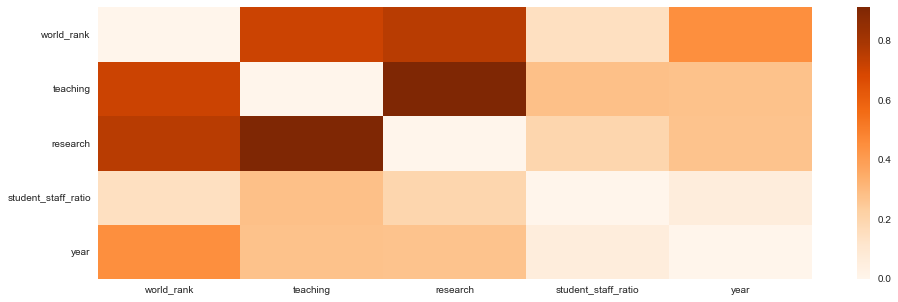

In [116]:
# Heat map, showing the same information than before, the darker, the stronger is the relationship. 
fig, ax = plt.subplots(figsize=(16,5));        # Sample figsize in inches
cor = timesRanking.loc[:,['world_rank','teaching','research','student_staff_ratio','year']]\
        .corr().abs()
cor.values[[np.arange(5)]*2] = 0
sns.heatmap(cor,cmap='Oranges');

In [117]:
timesRanking.loc[timesRanking.year==2016,:].sort_values('world_rank',ascending=True)\
        .head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1803,1.0,California Institute of Technology,United States of America,95.6,64.0,97.6,99.8,97.8,95.2,2243.0,6.9,0.27,33 : 67,2016
1804,2.0,University of Oxford,United Kingdom,86.5,94.4,98.9,98.8,73.1,94.2,19919.0,11.6,0.34,46 : 54,2016
1805,3.0,Stanford University,United States of America,92.5,76.3,96.2,99.9,63.3,93.9,15596.0,7.8,0.22,42 : 58,2016
1806,4.0,University of Cambridge,United Kingdom,88.2,91.5,96.7,97.0,55.0,92.8,18812.0,11.8,0.34,46 : 54,2016
1807,5.0,Massachusetts Institute of Technology,United States of America,89.4,84.0,88.6,99.7,95.4,92.0,11074.0,9.0,0.33,37 : 63,2016
1808,6.0,Harvard University,United States of America,83.6,77.2,99.0,99.8,45.2,91.6,20152.0,8.9,0.25,NaN,2016
1809,7.0,Princeton University,United States of America,85.1,78.5,91.9,99.3,52.1,90.1,7929.0,8.4,0.27,45 : 55,2016
1810,8.0,Imperial College London,United Kingdom,83.3,96.0,88.5,96.7,53.7,89.1,15060.0,11.7,0.51,37 : 63,2016
1811,9.0,ETH Zurich – Swiss Federal Institute of Techno...,Switzerland,77.0,97.9,95.0,91.1,80.0,88.3,18178.0,14.7,0.37,31 : 69,2016
1812,10.0,University of Chicago,United States of America,85.7,65.0,88.9,99.2,36.6,87.9,14221.0,6.9,0.21,42 : 58,2016


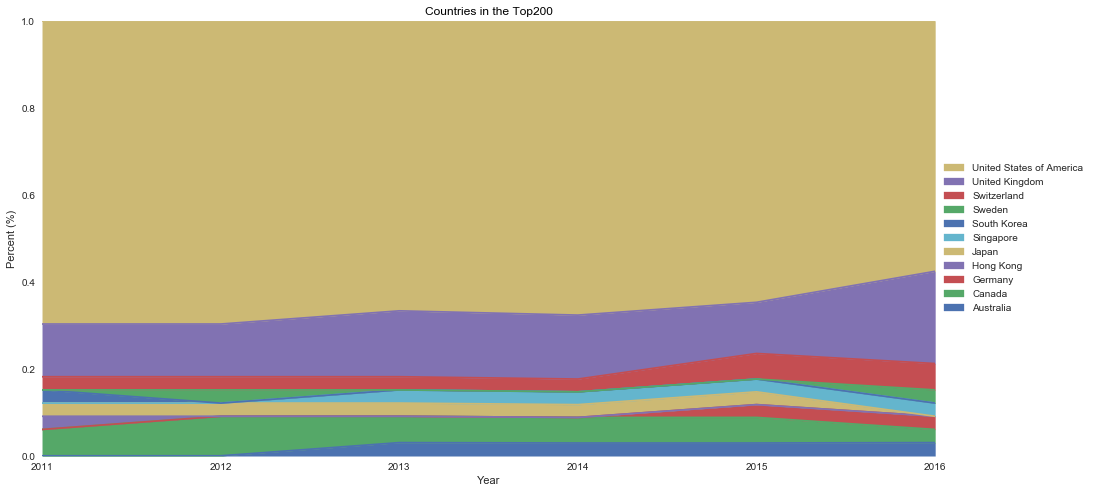

In [119]:
# Area plot, showing the participation of each country in the top 200. 
# we need to pivot by country in order to do this.
gy = pd.DataFrame(timesRanking.sort_values('world_rank',ascending=True).head(200)\
             .groupby(['country','year']).size())
gy.columns = ['num']
gy.reset_index(inplace=True)

pivoted = pd.pivot_table(gy,values='num',columns='country', \
             index='year')
pivoted = pivoted.divide(pivoted.sum(axis=1), axis=0)

f = plt.figure()
plt.title('Countries in the Top200', color='black')
ax = pivoted.plot(kind='area', stacked=True,figsize=(16,8),ax=f.gca())
handles, labels = ax.get_legend_handles_labels()
plt.legend(handles[::-1], labels[::-1],loc='center left', bbox_to_anchor=(1.0, 0.5))
ax.set_ylabel('Percent (%)');
ax.set_xlabel('Year');
ax.set_ylim(0,1)
plt.show()

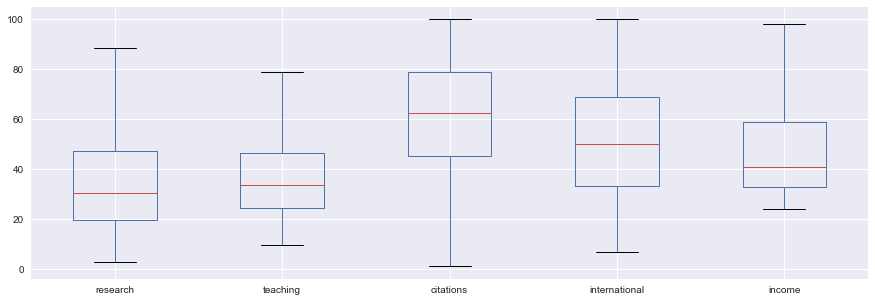

In [118]:
# Box plots, for several variables
timesRanking[['research','teaching','citations','international','income']].plot.box(figsize=(15,5));

In [120]:
# We will do a box plot for a variable for the different countries. In order to do this we will use the top_countries list created before.
timesTopCountries = timesRanking[timesRanking.country.isin(list(top_countries.index))]

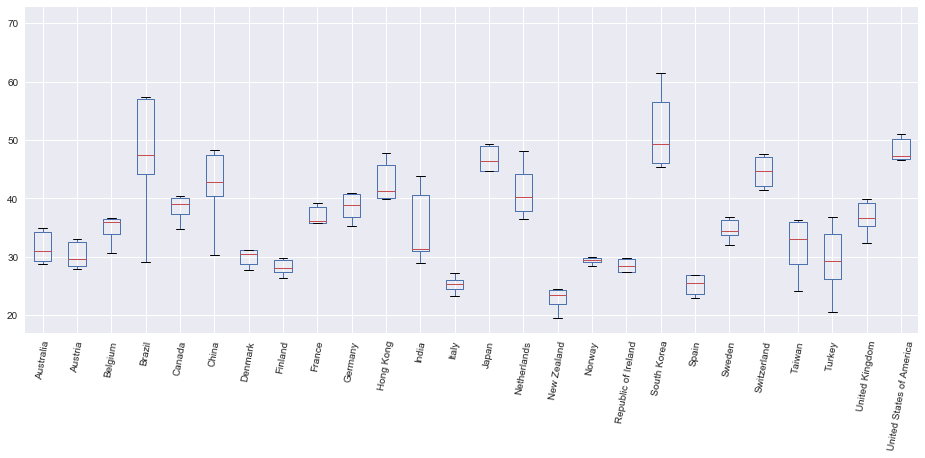

In [121]:
# Box Plots for the different variables. In class we did this for teaching, research, income, citations, ...
# just modify the column selection instead of teaching we can use any of the others
researchByCountry = timesTopCountries[['country','teaching','year']]\
        .pivot_table(index='year',columns='country')
researchByCountry.columns = researchByCountry.columns.droplevel()
researchByCountry.plot.box(figsize=(16,6),rot=80);

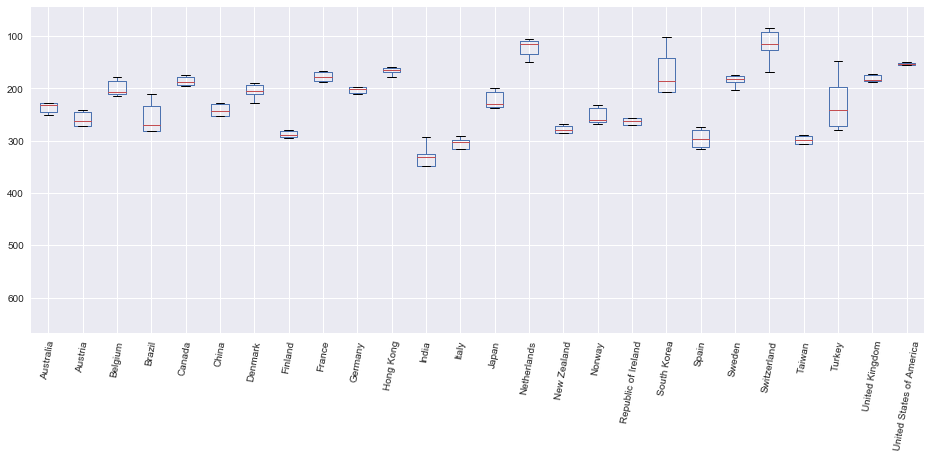

In [122]:
# Same as before, but as it is a world_rank and the lower the better, we invert y axis
researchByCountry = timesTopCountries[['country','world_rank','year']]\
        .pivot_table(index='year',columns='country')
researchByCountry.columns = researchByCountry.columns.droplevel()
researchByCountry.plot.box(figsize=(16,6),rot=80);
plt.gca().invert_yaxis()